In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data =  pd.read_csv('data/letter-recognition.data', sep=",", header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [11]:
columnNames = ["lettr", "x_box", "y_box", "width", "thigh", "onpix", "x_bar", "y_bar", "x2_bar", "y2_bar", "xy_bar", "x2y_br", "xy2br", "x_ege", "xegvy", "y_ege", "yegvx"]

In [12]:
data.columns = columnNames

In [13]:
HandK = data[(data['lettr'] == 'H') | (data['lettr'] == 'K')]
HandK

,lettr,x_box,y_box,width,thigh,onpix,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_br,xy2br,x_ege,xegvy,y_ege,yegvx
21,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
28,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
64,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
66,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
69,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
19931,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9
19937,H,3,8,5,6,4,8,8,7,7,7,5,7,3,8,3,7
19957,H,5,7,8,5,5,9,7,3,6,10,4,7,5,8,4,9


In [14]:
MandY = data[(data['lettr'] == 'M') | (data['lettr'] == 'Y')]
MandY

,lettr,x_box,y_box,width,thigh,onpix,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_br,xy2br,x_ege,xegvy,y_ege,yegvx
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
13,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
26,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
34,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
50,Y,7,11,9,8,8,9,5,6,4,7,8,8,3,9,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4
19949,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
19979,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6
19982,Y,3,9,5,6,3,7,9,1,6,6,11,8,2,11,2,7


In [15]:
EandT = data[(data['lettr'] == 'E') | (data['lettr'] == 'T')]
EandT

,lettr,x_box,y_box,width,thigh,onpix,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_br,xy2br,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
18,T,6,11,6,8,5,6,11,5,6,11,9,4,3,12,2,4
39,E,3,4,3,6,2,3,8,6,10,7,6,15,0,8,7,8
41,E,3,7,4,5,4,7,7,5,8,8,8,9,3,9,6,9
62,E,6,9,4,4,2,7,7,4,7,10,6,10,1,9,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19973,T,4,4,5,3,2,5,12,2,8,11,9,4,0,10,2,4
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19992,E,4,9,5,6,3,5,9,2,10,10,8,9,2,8,5,5
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6


In [16]:
yDataHandK = HandK.lettr
yDataMandY = MandY.lettr
yDataEandT = EandT.lettr
XDataHandK = HandK.drop(["lettr"], axis=1)
XDataMandY = MandY.drop(["lettr"], axis=1)
XDataEandT = EandT.drop(["lettr"], axis=1)
yAll = data.lettr
XAll = data.drop(["lettr"], axis=1)

In [17]:
X_train_MandY, X_test_MandY, y_train_MandY, y_test_MandY = train_test_split(XDataMandY, yDataMandY, test_size=0.1, random_state=42)
X_train_HandK, X_test_HandK, y_train_HandK, y_test_HandK = train_test_split(XDataHandK, yDataHandK, test_size=0.1, random_state=42)
X_train_EandT, X_test_EandT, y_train_EandT, y_test_EandT = train_test_split(XDataEandT, yDataEandT, test_size=0.1, random_state=42)
X_train_All, X_test_All, y_train_All, y_test_All = train_test_split(XAll, yAll, test_size=0.1, random_state=42)

In [10]:
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile

## M and Y

#### Random Forest Classifier

In [11]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(randomForest, X_train_MandY, y_train_MandY, cv=5)
print(np.mean(cv_results.get("test_score")))

0.9788732394366196


In [12]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    randomForest = RandomForestClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(randomForest, X_train_MandY, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.9570422535211268
0.9788732394366196
0.9880281690140844
0.9943661971830986
0.9964788732394366
0.9971830985915492
0.9971830985915492
0.9971830985915492
Best performance:  0.9971830985915492
Ideal max depth:  10


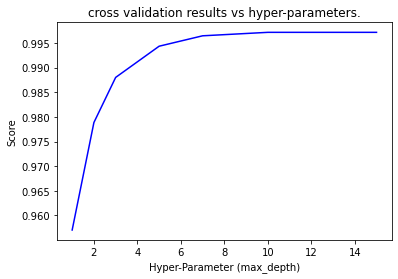

In [13]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [14]:
# make the best model and test with testing data
randomForest = RandomForestClassifier(max_depth=10, random_state=0)
randomForest.fit(X_train_MandY, y_train_MandY)
y_pred = randomForest.predict(X_test_MandY)
accuracy_score(y_test_MandY, y_pred)

0.9936708860759493

Let's dive deeper into the performance of our model with a confusion matrix.

In [15]:
confusion_matrix(y_test_MandY, y_pred)

array([[82,  0],
       [ 1, 75]], dtype=int64)

#### Decision Tree Classifier

In [16]:
decisionTree = tree.DecisionTreeClassifier()
cv_results = cross_validate(decisionTree, X_train_MandY, y_train_MandY, cv=5)
print(np.mean(cv_results.get("test_score")))

0.9929577464788732


In [17]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(decisionTree, X_train_MandY, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.95
0.9711267605633804
0.980281690140845
0.9894366197183098
0.9922535211267605
0.9908450704225352
0.9908450704225352
0.9908450704225352
Best performance:  0.9922535211267605
Ideal max depth:  7


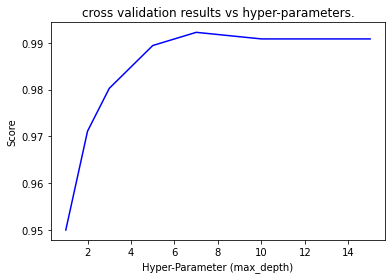

In [18]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [19]:
decisionTree = tree.DecisionTreeClassifier(max_depth=7, random_state=0)
decisionTree.fit(X_train_MandY, y_train_MandY)
y_pred = decisionTree.predict(X_test_MandY)
accuracy_score(y_test_MandY, y_pred)

0.9936708860759493

Let's dive deeper into the performance of our model with a confusion matrix.

In [20]:
confusion_matrix(y_test_MandY, y_pred)

array([[82,  0],
       [ 1, 75]], dtype=int64)

#### KNN

In [21]:
# Create the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_MandY, y_train_MandY)

# Predict the classes of the test set
y_pred = knn.predict(X_test_MandY)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_MandY, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(knn, X_train_MandY, y_train_MandY, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 0.9936708860759493

Cross-validation Average Test Score:
0.997887323943662


In [22]:
# Tuning k Hyperparameter
max_k = 15
scores = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_MandY, y_train_MandY)
    y_pred = knn.predict(X_test_MandY)
    cv_results = cross_validate(knn, X_train_MandY, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal k: ", scores.index(max(scores))+1)

0.9992957746478872
0.9985915492957746
0.9992957746478872
0.997887323943662
0.997887323943662
0.997887323943662
0.997887323943662
0.997887323943662
0.997887323943662
0.997887323943662
0.9971830985915492
0.997887323943662
0.9971830985915492
0.9971830985915492
Best performance:  0.9992957746478872
Ideal k:  1


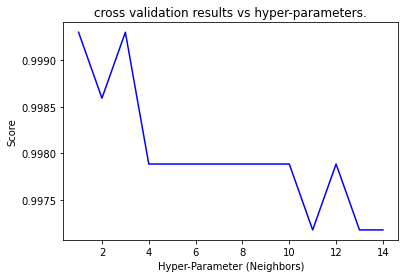

In [23]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (Neighbors)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_MandY, y_train_MandY)
y_pred = knn.predict(X_test_MandY)
accuracy_score(y_test_MandY, y_pred)

1.0

Let's dive deeper into the performance of our model with a confusion matrix.

In [25]:
confusion_matrix(y_test_MandY, y_pred)

array([[82,  0],
       [ 0, 76]], dtype=int64)

#### SVM

In [26]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svm.fit(X_train_MandY, y_train_MandY)

# Predict the classes of the test set
y_pred = svm.predict(X_test_MandY)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_MandY, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(svm, X_train_MandY, y_train_MandY, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 1.0

Cross-validation Average Test Score:
0.9971830985915492


In [27]:
# Tuning C Hyperparameter
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_MandY, y_train_MandY)
    y_pred = svm.predict(X_test_MandY)
    cv_results = cross_validate(svm, X_train_MandY, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.9971830985915492
Ideal C:  1


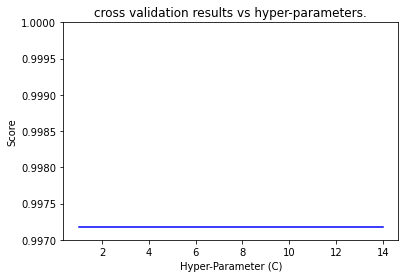

In [28]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (C)')
plt.ylabel('Score')
plt.yscale('linear')
plt.ylim(0.997,1)
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [29]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_MandY, y_train_MandY)
y_pred = svm.predict(X_test_MandY)
accuracy_score(y_test_MandY, y_pred)

1.0

Let's dive deeper into the performance of our model with a confusion matrix.

In [30]:
confusion_matrix(y_test_MandY, y_pred)

array([[82,  0],
       [ 0, 76]], dtype=int64)

## H and K

#### Random Forest Classifier

In [31]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(randomForest, X_train_HandK, y_train_HandK, cv=5)
cv_results

{'fit_time': array([0.28373504, 0.29301095, 0.28156233, 0.28890729, 0.27983713]),
 'score_time': array([0.02315235, 0.02909303, 0.02766252, 0.03127766, 0.02449751]),
 'test_score': array([0.84150943, 0.90943396, 0.86037736, 0.85283019, 0.8       ])}

In [32]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    randomForest = RandomForestClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(randomForest, X_train_HandK, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.8226415094339623
0.8528301886792453
0.8747169811320754
0.9162264150943397
0.9486792452830188
0.9630188679245283
0.9615094339622641
0.9622641509433961
Best performance:  0.9630188679245283
Ideal max depth:  10


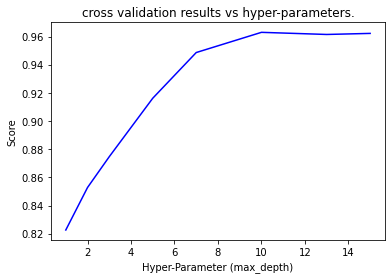

In [33]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [34]:
randomForest = RandomForestClassifier(max_depth=10, random_state=0)
randomForest.fit(X_train_HandK, y_train_HandK)
y_pred = randomForest.predict(X_test_HandK)
accuracy_score(y_test_HandK, y_pred)

1.0

Let's dive deeper into the performance of our model with a confusion matrix.

In [35]:
confusion_matrix(y_test_HandK, y_pred)

array([[68,  0],
       [ 0, 80]], dtype=int64)

#### Decision Tree Classifier

In [36]:
decisionTree = tree.DecisionTreeClassifier()
cv_results = cross_validate(decisionTree, X_train_HandK, y_train_HandK, cv=5)
print(np.mean(cv_results.get("test_score")))

0.9373584905660378


In [37]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15, 17, 20]
scores = []
for i in range(len(max_depths)):
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(decisionTree, X_train_HandK, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.8226415094339623
0.8475471698113208
0.8596226415094339
0.898867924528302
0.9192452830188678
0.9328301886792453
0.929811320754717
0.9350943396226417
0.9350943396226417
0.9350943396226417
Best performance:  0.9350943396226417
Ideal max depth:  15


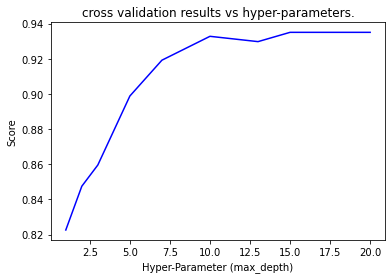

In [38]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [39]:
decisionTree = tree.DecisionTreeClassifier(max_depth=15, random_state=0)
decisionTree.fit(X_train_HandK, y_train_HandK)
y_pred = decisionTree.predict(X_test_HandK)
accuracy_score(y_test_HandK, y_pred)

1.0

Let's dive deeper into the performance of our model with a confusion matrix.

In [40]:
confusion_matrix(y_test_HandK, y_pred)

array([[68,  0],
       [ 0, 80]], dtype=int64)

#### KNN

In [41]:
# Create the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train_HandK, y_train_HandK)

# Predict the classes of the test set
y_pred = knn.predict(X_test_HandK)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_HandK, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(knn, X_train_HandK, y_train_HandK, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 0.9797297297297297

Cross-validation Average Test Score:
0.9501886792452832


In [42]:
# Tuning k Hyperparameter
max_k = 15
scores = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_HandK, y_train_HandK)
    y_pred = knn.predict(X_test_HandK)
    cv_results = cross_validate(knn, X_train_HandK, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal k: ", scores.index(max(scores))+1)

Best performance:  0.9532075471698114
Ideal k:  5


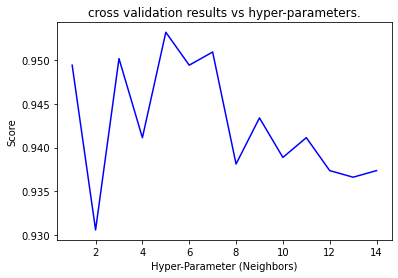

In [43]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (Neighbors)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_HandK, y_train_HandK)
y_pred = knn.predict(X_test_HandK)
accuracy_score(y_test_HandK, y_pred)

0.9864864864864865

Let's dive deeper into the performance of our model with a confusion matrix.

In [45]:
confusion_matrix(y_test_HandK, y_pred)

array([[67,  1],
       [ 1, 79]], dtype=int64)

#### SVM

In [46]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svm.fit(X_train_HandK, y_train_HandK)

# Predict the classes of the test set
y_pred = svm.predict(X_test_HandK)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_HandK, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(svm, X_train_HandK, y_train_HandK, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 0.9662162162162162

Cross-validation Average Test Score:
0.9237735849056603


In [47]:
# Tuning C Hyperparameter
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_HandK, y_train_HandK)
    y_pred = svm.predict(X_test_HandK)
    cv_results = cross_validate(svm, X_train_HandK, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.9252830188679246
Ideal C:  6


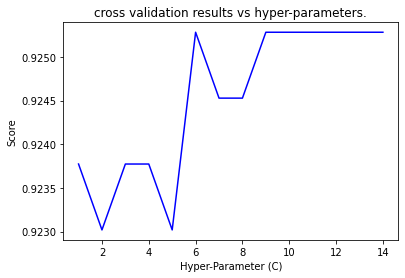

In [48]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (C)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [49]:
svm = SVC(kernel='linear', C=3)
svm.fit(X_train_HandK, y_train_HandK)
y_pred = svm.predict(X_test_HandK)
accuracy_score(y_test_HandK, y_pred)

0.9662162162162162

Let's dive deeper into the performance of our model with a confusion matrix.

In [50]:
confusion_matrix(y_test_HandK, y_pred)

array([[66,  2],
       [ 3, 77]], dtype=int64)

### E and T

#### Random Forest Classifier

In [51]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(randomForest, X_train_EandT, y_train_EandT, cv=5)
print(np.mean(cv_results.get("test_score")))

0.919696625526867


In [52]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    randomForest = RandomForestClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(randomForest, X_train_EandT, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.9047727215365589
0.919696625526867
0.9310643345700512
0.9680220085308295
0.9914742182176118
0.9936044017061659
0.994313621564322
0.994313621564322
Best performance:  0.994313621564322
Ideal max depth:  13


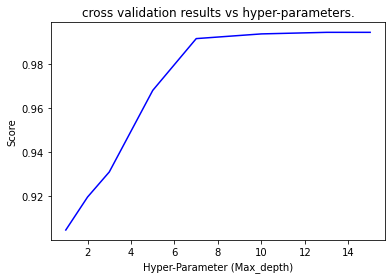

In [53]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (Max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [54]:
randomForest = RandomForestClassifier(max_depth=13, random_state=0)
randomForest.fit(X_train_EandT, y_train_EandT)
y_pred = randomForest.predict(X_test_EandT)
accuracy_score(y_test_EandT, y_pred)

1.0

Let's dive deeper into the performance of our model with a confusion matrix.

In [55]:
confusion_matrix(y_test_EandT, y_pred)

array([[79,  0],
       [ 0, 78]], dtype=int64)

#### Decision Tree Classifier

In [56]:
decisionTree = tree.DecisionTreeClassifier()
cv_results = cross_validate(decisionTree, X_train_EandT, y_train_EandT, cv=5)
print(np.mean(cv_results.get("test_score")))

0.9737008152242497


In [57]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(decisionTree, X_train_EandT, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.8983720754145528
0.913293455490775
0.9239519446758031
0.9687312283889856
0.9800989374321698
0.9758335226268897
0.9772570101713738
0.9772570101713738
Best performance:  0.9800989374321698
Ideal max depth:  7


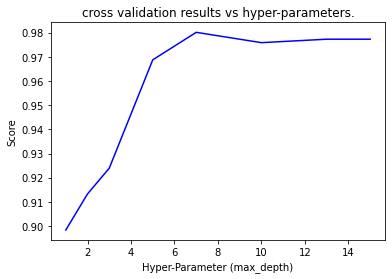

In [58]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [59]:
decisionTree = tree.DecisionTreeClassifier(max_depth=7, random_state=0)
decisionTree.fit(X_train_EandT, y_train_EandT)
y_pred = decisionTree.predict(X_test_EandT)
accuracy_score(y_test_EandT, y_pred)

0.9745222929936306

Let's dive deeper into the performance of our model with a confusion matrix.

In [60]:
confusion_matrix(y_test_EandT, y_pred)

array([[77,  2],
       [ 2, 76]], dtype=int64)

#### KNN

In [61]:
# Create the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_EandT, y_train_EandT)

# Predict the classes of the test set
y_pred = knn.predict(X_test_EandT)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_EandT, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(knn, X_train_EandT, y_train_EandT, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 1.0

Cross-validation Average Test Score:
0.99644128113879


In [62]:
# Tuning k Hyperparameter
max_k = 15
scores = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_EandT, y_train_EandT)
    y_pred = knn.predict(X_test_EandT)
    cv_results = cross_validate(knn, X_train_EandT, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal k: ", scores.index(max(scores))+1)

Best performance:  0.9992882562277579
Ideal k:  1


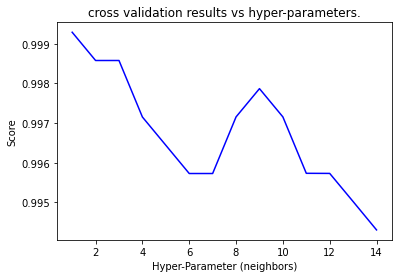

In [63]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (neighbors)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_EandT, y_train_EandT)
y_pred = knn.predict(X_test_EandT)
accuracy_score(y_test_EandT, y_pred)

1.0

Let's dive deeper into the performance of our model with a confusion matrix.

In [65]:
confusion_matrix(y_test_EandT, y_pred)

array([[79,  0],
       [ 0, 78]], dtype=int64)

#### SVM

In [66]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svm.fit(X_train_EandT, y_train_EandT)

# Predict the classes of the test set
y_pred = svm.predict(X_test_EandT)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_EandT, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(svm, X_train_EandT, y_train_EandT, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 0.9681528662420382

Cross-validation Average Test Score:
0.9609171903788395


In [67]:
# Tuning C Hyperparameter
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_EandT, y_train_EandT)
    y_pred = svm.predict(X_test_EandT)
    cv_results = cross_validate(svm, X_train_EandT, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.9630448499533075
Ideal C:  4


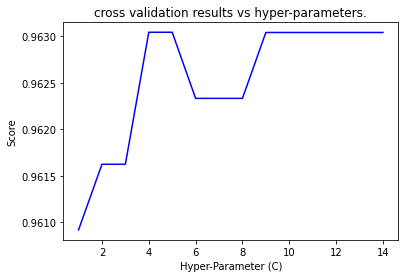

In [68]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (C)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [69]:
svm = SVC(kernel='linear', C=4)
svm.fit(X_train_EandT, y_train_EandT)
y_pred = svm.predict(X_test_EandT)
accuracy_score(y_test_EandT, y_pred)

0.9617834394904459

Let's dive deeper into the performance of our model with a confusion matrix.

In [70]:
confusion_matrix(y_test_EandT, y_pred)

array([[78,  1],
       [ 5, 73]], dtype=int64)

### Multi class classification

In [18]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svm.fit(X_train_All, y_train_All)

# Predict the classes of the test set
y_pred = svm.predict(X_test_All)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_All, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

print()
print("Cross-validation Average Test Score:")

# Perform 10-fold cross-validation
cv_results = cross_validate(svm, X_train_All, y_train_All, cv=5)
print(np.mean(cv_results.get("test_score")))

Accuracy: 0.8585

Cross-validation Average Test Score:
0.8542777777777777


In [19]:
# Tuning C Hyperparameter
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_All, y_train_All)
    y_pred = svm.predict(X_test_All)
    cv_results = cross_validate(svm, X_train_All, y_train_All, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.8542777777777777
Ideal C:  1


In [21]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_All, y_train_All)
y_pred = svm.predict(X_test_All)
accuracy_score(y_test_All, y_pred)

0.8585

In [ ]:
confusion_matrix(y_test_EandT, y_pred)

# Feature Selection

## Feature Selection for H and K

#### RFE for Random Forest

In [71]:
estimator = RandomForestClassifier(max_depth=2, random_state=0)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_HandK, y_train_HandK)

In [72]:
selector.support_

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True])

In [73]:
selected = X_train_HandK.loc[:, selector.support_]
selected

,x_bar,x2_bar,xy2br,yegvx
1224,5,7,10,11
1256,6,3,9,7
3956,11,4,6,10
13842,4,6,11,10
2113,4,3,11,5
...,...,...,...,...
15164,7,1,9,7
17523,9,1,8,9
11385,6,3,8,7
19772,7,15,8,8


In [74]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(randomForest, selected, y_train_HandK, cv=5)
cv_results

{'fit_time': array([0.28896308, 0.29554224, 0.26322961, 0.26382303, 0.32953835]),
 'score_time': array([0.02558088, 0.02831316, 0.02280331, 0.02612162, 0.02630401]),
 'test_score': array([0.84528302, 0.91698113, 0.86792453, 0.86037736, 0.81509434])}

In [75]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    randomForest = RandomForestClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(randomForest, selected, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.8166037735849058
0.8611320754716981
0.8837735849056605
0.9026415094339623
0.9109433962264151
0.9033962264150943
0.9041509433962265
0.9049056603773586
Best performance:  0.9109433962264151
Ideal max depth:  7


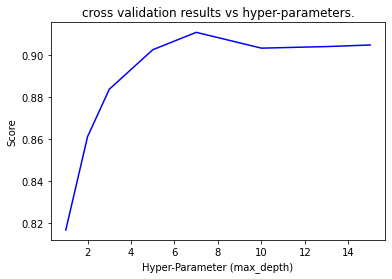

In [76]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [77]:
randomForest = RandomForestClassifier(max_depth=7, random_state=0)
randomForest.fit(selected, y_train_HandK)
test_selected = X_test_HandK.loc[:, selector.support_]
y_pred = randomForest.predict(test_selected)
accuracy_score(y_test_HandK, y_pred)

0.9391891891891891

#### RFE for Decision Tree

In [78]:
estimator = tree.DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_HandK, y_train_HandK)

In [79]:
selector.support_

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False, False, False])

In [80]:
selected = X_train_HandK.loc[:, selector.support_]
selected

,x2_bar,xy_bar,xy2br,x_ege
1224,7,7,10,3
1256,3,10,9,3
3956,4,11,6,5
13842,6,7,11,3
2113,3,11,11,4
...,...,...,...,...
15164,1,10,9,5
17523,1,10,8,6
11385,3,10,8,4
19772,15,7,8,3


In [81]:
decisionTree = tree.DecisionTreeClassifier()
cv_results = cross_validate(decisionTree, selected, y_train_HandK, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.00898409, 0.01287246, 0.01022148, 0.01173544, 0.00992441]),
 'score_time': array([0.00679493, 0.00651598, 0.00855517, 0.00657344, 0.00532079]),
 'test_score': array([0.90566038, 0.95471698, 0.93962264, 0.9245283 , 0.93207547]),
 'train_score': array([0.97641509, 0.96792453, 0.96981132, 0.97264151, 0.96792453])}

In [82]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(decisionTree, selected, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.8226415094339623
0.8475471698113208
0.8649056603773586
0.8898113207547171
0.9230188679245284
0.9313207547169812
0.9328301886792453
0.9320754716981131
Best performance:  0.9328301886792453
Ideal max depth:  13


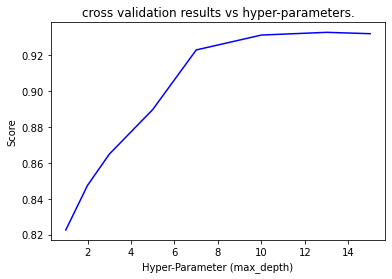

In [83]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [84]:
decisionTree = tree.DecisionTreeClassifier(max_depth=13, random_state=0)
decisionTree.fit(selected, y_train_HandK)
test_selected = X_test_HandK.loc[:, selector.support_]
y_pred = decisionTree.predict(test_selected)
accuracy_score(y_test_HandK, y_pred)

0.9797297297297297

#### Scoring Methods for KNN

In [85]:
# Perform Univariate Feature Selection
selector = SelectKBest(chi2, k=2)
X_train_HandK_selected = selector.fit_transform(X_train_HandK, y_train_HandK)
X_test_HandK_selected = selector.fit_transform(X_test_HandK, y_test_HandK)

# Tuning k Hyperparameter
max_k = 15
scores = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_HandK_selected, y_train_HandK)
    y_pred = knn.predict(X_test_HandK_selected)
    cv_results = cross_validate(knn, X_train_HandK_selected, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal k: ", scores.index(max(scores))+1)


Best performance:  0.8679245283018868
Ideal k:  13


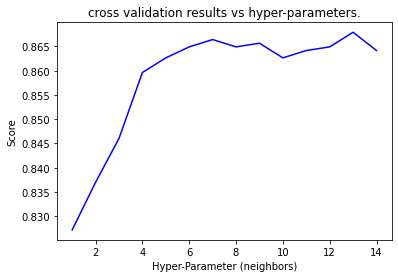

In [86]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (neighbors)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [87]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_HandK_selected, y_train_HandK)
y_pred = knn.predict(X_test_HandK_selected)
accuracy_score(y_test_HandK, y_pred)

0.5608108108108109

#### RFE for SVM

In [88]:
estimator = SVC(kernel='linear', C=1)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_HandK, y_train_HandK)

In [89]:
X_train_HandK_selected = X_train_HandK.loc[:, selector.support_]
X_test_HandK_selected = X_test_HandK.loc[:, selector.support_]

In [90]:
# Tuning C Hyperparameter with selected features
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_HandK_selected, y_train_HandK)
    y_pred = svm.predict(X_train_HandK_selected)
    cv_results = cross_validate(svm, X_train_HandK_selected, y_train_HandK, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.909433962264151
Ideal C:  5


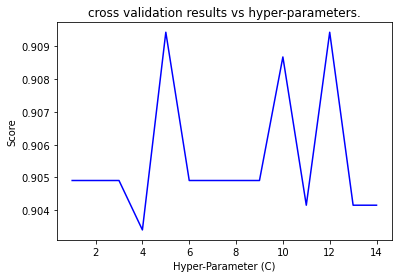

In [91]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (C)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [92]:
svm = SVC(kernel='linear', C=7)
svm.fit(X_train_HandK_selected, y_train_HandK)
y_pred = svm.predict(X_test_HandK_selected)
accuracy_score(y_test_HandK, y_pred)

0.9527027027027027

## Feature selection for M and Y

#### RFE for Random Forest

In [93]:
estimator = RandomForestClassifier(max_depth=2, random_state=0)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_MandY, y_train_MandY)

In [94]:
selector.support_

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True,  True, False, False])

In [95]:
selected = X_train_MandY.loc[:, selector.support_]
selected

,y_bar,x2y_br,x_ege,xegvy
2045,10,11,1,11
2468,11,12,1,11
17140,5,8,8,6
5281,11,10,1,11
7930,7,9,9,6
...,...,...,...,...
13995,10,9,1,11
16058,9,9,1,11
10479,9,12,1,10
18334,8,6,4,10


In [96]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(randomForest, selected, y_train_MandY, cv=5)
cv_results

{'fit_time': array([0.30609632, 0.38796282, 0.27498031, 0.27241063, 0.26977062]),
 'score_time': array([0.03979445, 0.02551007, 0.03759003, 0.02558041, 0.03224969]),
 'test_score': array([0.97887324, 0.98591549, 0.98943662, 0.98239437, 0.98239437])}

In [97]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    randomForest = RandomForestClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(randomForest, selected, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.9669014084507044
0.9838028169014084
0.9816901408450704
0.9887323943661972
0.9894366197183098
0.9915492957746478
0.9915492957746478
0.9915492957746478
Best performance:  0.9915492957746478
Ideal max depth:  10


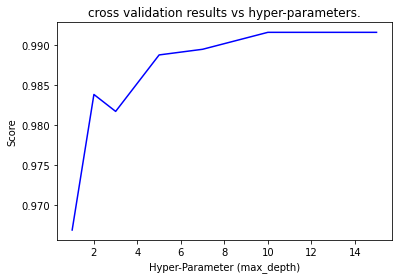

In [98]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [99]:
randomForest = RandomForestClassifier(max_depth=10, random_state=0)
randomForest.fit(selected, y_train_MandY)
test_selected = X_test_MandY.loc[:, selector.support_]
y_pred = randomForest.predict(test_selected)
accuracy_score(y_test_MandY, y_pred)

0.9936708860759493

#### RFE for Decision Tree

In [100]:
estimator = tree.DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_MandY, y_train_MandY)

In [101]:
selector.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True])

In [102]:
selected = X_train_MandY.loc[:, selector.support_]
selected

,thigh,x_ege,xegvy,yegvx
2045,4,1,11,8
2468,8,1,11,8
17140,6,8,6,6
5281,3,1,11,5
7930,6,9,6,8
...,...,...,...,...
13995,2,1,11,5
16058,6,1,11,5
10479,1,1,10,8
18334,6,4,10,5


In [103]:
decisionTree = tree.DecisionTreeClassifier()
cv_results = cross_validate(decisionTree, selected, y_train_MandY, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.00774837, 0.00649714, 0.00850821, 0.00652432, 0.00687289]),
 'score_time': array([0.00384688, 0.00399446, 0.00362182, 0.00359201, 0.00298476]),
 'test_score': array([0.98943662, 0.98591549, 0.98239437, 0.99295775, 0.98591549]),
 'train_score': array([0.99823944, 1.        , 0.99911972, 0.99823944, 0.99911972])}

In [104]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(decisionTree, selected, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.95
0.9774647887323944
0.9774647887323944
0.9873239436619718
0.9866197183098592
0.9852112676056338
0.9852112676056338
0.9852112676056338
Best performance:  0.9873239436619718
Ideal max depth:  5


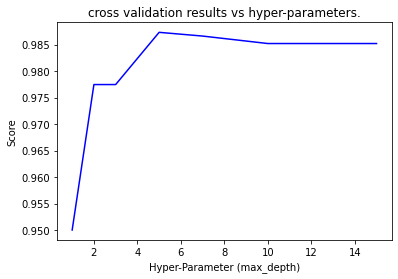

In [105]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [106]:
decisionTree = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
decisionTree.fit(selected, y_train_MandY)
test_selected = X_test_MandY.loc[:, selector.support_]
y_pred = decisionTree.predict(test_selected)
accuracy_score(y_test_MandY, y_pred)

0.9873417721518988

#### Scoring Methods for KNN

In [107]:
# Perform Univariate Feature Selection
selector = SelectKBest(chi2, k=2)
X_train_MandY_selected = selector.fit_transform(X_train_MandY, y_train_MandY)
X_test_MandY_selected = selector.fit_transform(X_test_MandY, y_test_MandY)

# Tuning k Hyperparameter
max_k = 15
scores = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_MandY_selected, y_train_MandY)
    y_pred = knn.predict(X_test_MandY_selected)
    cv_results = cross_validate(knn, X_train_MandY_selected, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal k: ", scores.index(max(scores))+1)


Best performance:  0.963380281690141
Ideal k:  6


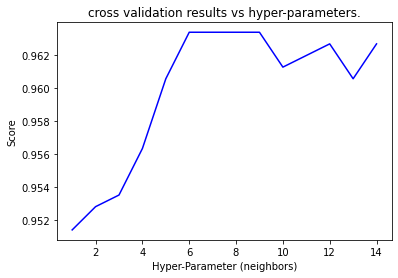

In [108]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (neighbors)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [109]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_MandY_selected, y_train_MandY)
y_pred = knn.predict(X_test_MandY_selected)
accuracy_score(y_test_MandY, y_pred)

0.35443037974683544

#### RFE for SVM

In [110]:
estimator = SVC(kernel='linear', C=1)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_MandY, y_train_MandY)

In [111]:
X_train_MandY_selected = X_train_MandY.loc[:, selector.support_]
X_test_MandY_selected = X_test_MandY.loc[:, selector.support_]

In [112]:
# Tuning C Hyperparameter with selected features
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_MandY_selected, y_train_MandY)
    y_pred = svm.predict(X_train_MandY_selected)
    cv_results = cross_validate(svm, X_train_MandY_selected, y_train_MandY, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.9887323943661972
Ideal C:  1


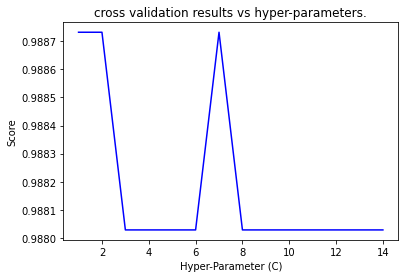

In [113]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (C)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [114]:
svm = SVC(kernel='linear', C=5)
svm.fit(X_train_MandY_selected, y_train_MandY)
y_pred = svm.predict(X_test_MandY_selected)
accuracy_score(y_test_MandY, y_pred)

0.9620253164556962

## Feature selection for E and T

#### RFE for Random Forest

In [115]:
estimator = RandomForestClassifier(max_depth=2, random_state=0)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_EandT, y_train_EandT)

In [116]:
selector.support_

array([False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False])

In [117]:
selected = X_train_EandT.loc[:, selector.support_]
selected

,y_bar,x2y_br,xy2br,y_ege
5932,7,6,9,5
663,7,5,8,5
6229,6,4,8,5
12824,7,8,9,4
15256,15,10,8,0
...,...,...,...,...
14244,13,9,4,1
16476,7,6,13,7
10620,12,9,5,2
18848,7,8,8,5


In [118]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(randomForest, selected, y_train_EandT, cv=5)
cv_results

{'fit_time': array([0.36886358, 0.39333081, 0.26166177, 0.35319567, 0.36171484]),
 'score_time': array([0.08417487, 0.02575588, 0.03047013, 0.03087378, 0.02608919]),
 'test_score': array([0.92907801, 0.90780142, 0.90747331, 0.95373665, 0.91459075])}

In [119]:
# Tuning max_depth Hyperparameter
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    randomForest = RandomForestClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(randomForest, selected, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.9005047828171928
0.9225360288735771
0.9289341510814972
0.9331970419726913
0.9403043840387673
0.9459932863885314
0.9474142500189293
0.9459882385603595
Best performance:  0.9474142500189293
Ideal max depth:  13


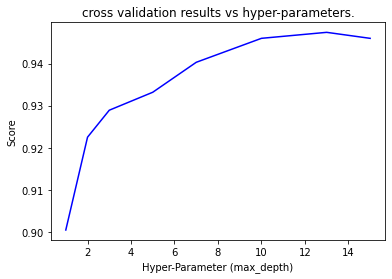

In [120]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [121]:
randomForest = RandomForestClassifier(max_depth=13, random_state=0)
randomForest.fit(selected, y_train_EandT)
test_selected = X_test_EandT.loc[:, selector.support_]
y_pred = randomForest.predict(test_selected)
accuracy_score(y_test_EandT, y_pred)

0.9299363057324841

#### RFE for Decision Tree

In [122]:
estimator = tree.DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_EandT, y_train_EandT)

In [123]:
selector.support_

array([False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False, False, False])

In [124]:
selected = X_train_EandT.loc[:, selector.support_]
selected

,y_bar,x2_bar,xy2br,x_ege
5932,7,5,9,2
663,7,2,8,2
6229,6,2,8,5
12824,7,3,9,2
15256,15,2,8,0
...,...,...,...,...
14244,13,3,4,1
16476,7,5,13,0
10620,12,3,5,1
18848,7,7,8,3


In [125]:
decisionTree = tree.DecisionTreeClassifier()
cv_results = cross_validate(decisionTree, selected, y_train_EandT, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.00649595, 0.00543404, 0.01352906, 0.00630116, 0.00572014]),
 'score_time': array([0.00204301, 0.00409436, 0.00594974, 0.00250268, 0.0031395 ]),
 'test_score': array([0.95744681, 0.92907801, 0.96441281, 0.97153025, 0.95373665]),
 'train_score': array([0.97866667, 0.98222222, 0.97424512, 0.97424512, 0.97779751])}

In [126]:
max_depths = [1, 2, 3, 5, 7, 10, 13, 15]
scores = []
for i in range(len(max_depths)):
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=0)
    cv_results = cross_validate(decisionTree, selected, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))
    print(np.mean(cv_results.get("test_score")))
print("Best performance: ", max(scores))
print("Ideal max depth: ", max_depths[scores.index(max(scores))])

0.8983720754145528
0.9232452487317332
0.9268039675929431
0.9438656268140633
0.9545291638272634
0.9509679210519675
0.9566618712299034
0.9545266399131774
Best performance:  0.9566618712299034
Ideal max depth:  13


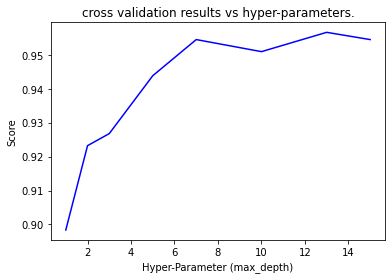

In [127]:
plt.plot(max_depths, scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (max_depth)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [128]:
decisionTree = tree.DecisionTreeClassifier(max_depth=13, random_state=0)
decisionTree.fit(selected, y_train_EandT)
test_selected = X_test_EandT.loc[:, selector.support_]
y_pred = decisionTree.predict(test_selected)
accuracy_score(y_test_EandT, y_pred)

0.9426751592356688

#### Scoring Methods for KNN

In [129]:
# Perform Univariate Feature Selection
selector = SelectKBest(chi2, k=2)
X_train_EandT_selected = selector.fit_transform(X_train_EandT, y_train_EandT)
X_test_EandT_selected = selector.fit_transform(X_test_EandT, y_test_EandT)

# Tuning k Hyperparameter
max_k = 15
scores = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_EandT_selected, y_train_EandT)
    y_pred = knn.predict(X_test_EandT_selected)
    cv_results = cross_validate(knn, X_train_EandT_selected, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal k: ", scores.index(max(scores))+1)


Best performance:  0.9012266222457788
Ideal k:  12


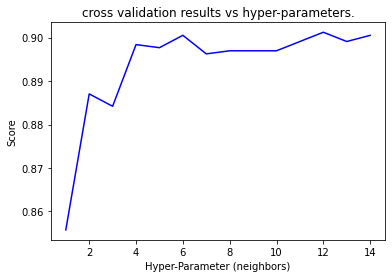

In [130]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (neighbors)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_EandT_selected, y_train_EandT)
y_pred = knn.predict(X_test_EandT_selected)
accuracy_score(y_test_EandT, y_pred)

0.8089171974522293

#### RFE for SVM

In [132]:
estimator = SVC(kernel='linear', C=1)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train_MandY, y_train_MandY)

In [133]:
X_train_MandY_selected = X_train_MandY.loc[:, selector.support_]
X_test_MandY_selected = X_test_MandY.loc[:, selector.support_]

In [134]:
# Tuning C Hyperparameter with selected features
max_C = 15
scores = []
for C in range(1, max_C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_EandT_selected, y_train_EandT)
    y_pred = svm.predict(X_train_EandT_selected)
    cv_results = cross_validate(svm, X_train_EandT_selected, y_train_EandT, cv=5)
    scores.append(np.mean(cv_results.get("test_score")))

print("Best performance: ", max(scores))
print("Ideal C: ", scores.index(max(scores))+1)

Best performance:  0.9005047828171928
Ideal C:  1


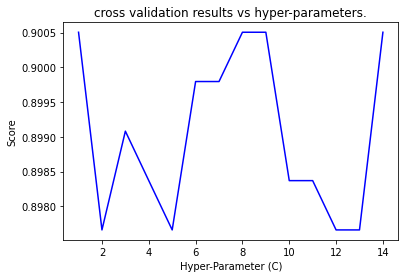

In [135]:
plt.plot(list(range(1,15)), scores, color='blue', linestyle='solid')
plt.xlabel('Hyper-Parameter (C)')
plt.ylabel('Score')
plt.yscale('linear')
plt.title('cross validation results vs hyper-parameters.')
plt.show()

In [136]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_EandT_selected, y_train_EandT)
y_pred = svm.predict(X_test_EandT_selected)
accuracy_score(y_test_EandT, y_pred)

0.8535031847133758